In [1]:
%matplotlib inline

In [2]:
# Copyright (c) 2016 MetPy Developers.
# Distributed under the terms of the BSD 3-Clause License.
# SPDX-License-Identifier: BSD-3-Clause

# Skew-T with Complex Layout

Combine a Skew-T and a hodograph using Matplotlib's `GridSpec` layout capability.

In [3]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, Hodograph, SkewT
from metpy.units import units

Upper air data can be obtained using the siphon package, but for this example we will use
some of MetPy's sample data.

In [4]:
col_names = ['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed']

df = pd.read_fwf(get_test_data('may4_sounding.txt', as_file_obj=False),
                 skiprows=5, usecols=[0, 1, 2, 3, 6, 7], names=col_names)

# Drop any rows with all NaN values for T, Td, winds
df = df.dropna(subset=('temperature', 'dewpoint', 'direction', 'speed'
                       ), how='all').reset_index(drop=True)

We will pull the data out of the example dataset into individual variables and
assign units.

In [5]:
p = df['pressure'].values * units.hPa
T = df['temperature'].values * units.degC
Td = df['dewpoint'].values * units.degC
wind_speed = df['speed'].values * units.knots
wind_dir = df['direction'].values * units.degrees
u, v = mpcalc.wind_components(wind_speed, wind_dir)

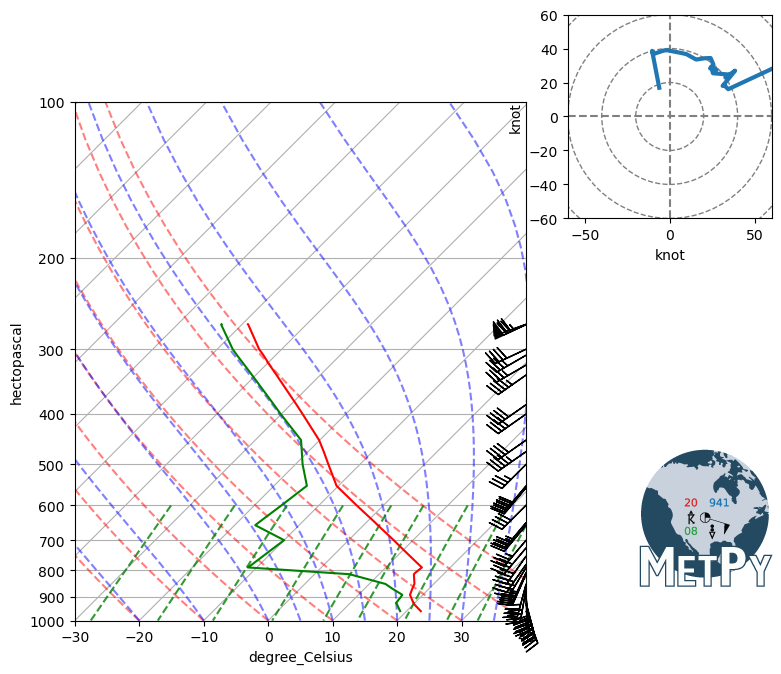

In [6]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
add_metpy_logo(fig, 630, 80, size='large')

# Grid for plots
gs = gridspec.GridSpec(3, 3)
skew = SkewT(fig, rotation=45, subplot=gs[:, :2])

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Good bounds for aspect ratio
skew.ax.set_xlim(-30, 40)

# Create a hodograph
ax = fig.add_subplot(gs[0, -1])
h = Hodograph(ax, component_range=60.)
h.add_grid(increment=20)
h.plot(u, v)

# Show the plot
plt.show()